In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import precision_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tp, fn, fp, tn = 15, 30, 15, 40

In [3]:
precision = tp / (tp + fp)

In [4]:
recall = tp / (tp + fn)

In [5]:
F1 = 2 * (precision * recall) / (precision + recall)

In [6]:
[precision, recall, F1]

[0.5, 0.3333333333333333, 0.4]

In [7]:
songs = pd.read_csv('data/songs.csv')

In [8]:
songs.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [9]:
X = pd.get_dummies(songs.drop(['artist', 'lyrics', 'song'], axis=1))
y = songs.artist

In [10]:
X.isnull().sum()

year             0
length           0
commas           0
exclamations     0
colons           0
hyphens          0
genre_Hip-Hop    0
genre_Metal      0
genre_Pop        0
dtype: int64

In [11]:
X.head()

,year,length,commas,exclamations,colons,hyphens,genre_Hip-Hop,genre_Metal,genre_Pop
0,2007,1300,24,5,0,11,1,0,0
1,2006,1566,0,0,0,0,0,1,0
2,2006,996,1,0,1,0,0,1,0
3,2015,2868,5,0,0,0,0,1,0
4,2014,3351,22,0,0,3,1,0,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
max_depth_values = range(1,10)
scores_data = pd.DataFrame()

In [14]:
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({
        'max_depth':[max_depth], 
        'train_score':[train_score], 
        'cross_val_score':[mean_cross_val_score]
    })
    scores_data = pd.concat([scores_data, temp_score_data])

In [15]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score','cross_val_score'], 
                           var_name='set_type', value_name='score')

<Axes: xlabel='max_depth', ylabel='score'>

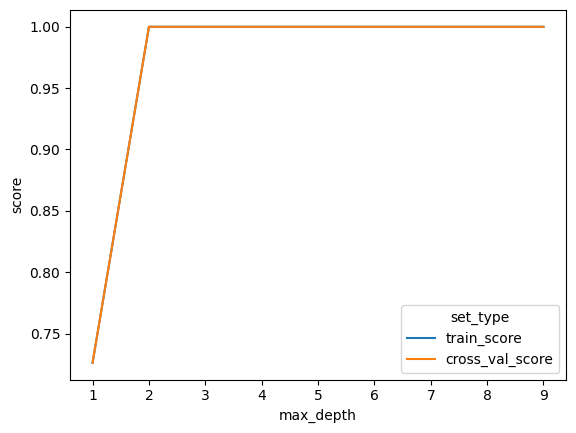

In [16]:
sns.lineplot(scores_data_long, x='max_depth', y='score', hue='set_type')

In [17]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

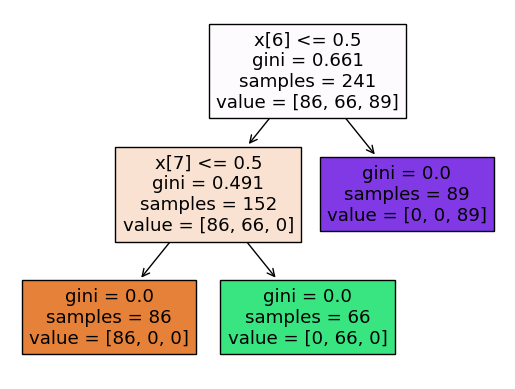

In [18]:
a = plot_tree(clf, filled=True)

In [19]:
y_pred = clf.predict(X_test)

In [20]:
precision_recall_fscore_support(y_test, y_pred, average='micro')

(1.0, 1.0, 1.0, None)

In [21]:
precision_score(y_test, y_pred, average='micro')

1.0